This file runs SR search for integers orders of Bessel function and then analyses the results

In [4]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from scipy import special
import sympy

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

from BesselML import Problem
from BesselML import Solution
from BesselML import Promising_solution
sympy.init_printing()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


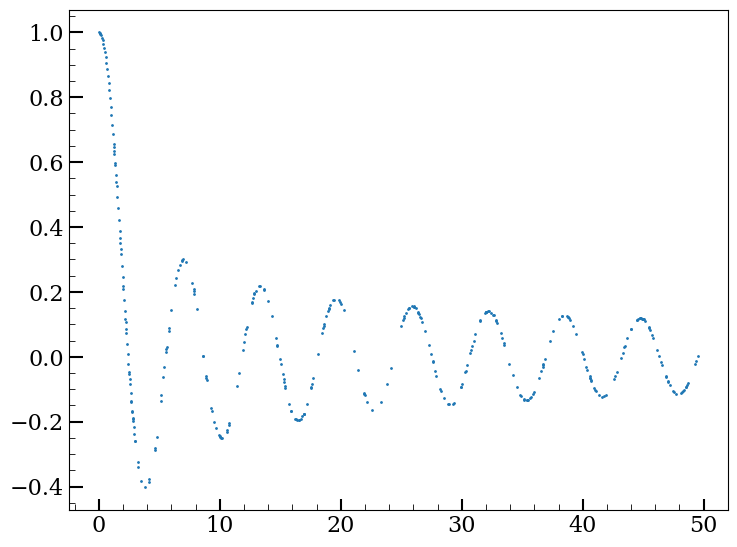

In [24]:
np.random.seed(42) #Keeping the seed for reproducibility

order = 0

x_train = np.sort(np.concatenate((np.random.uniform(1, 50, 300), np.linspace(1e-2, 3, 50))))
x_test = np.sort(np.concatenate((np.random.uniform(1, 50, 300), np.linspace(1e-2, 3, 50))))
# Training data from uniform distribution
# x_test = np.sort(np.concatenate((np.random.uniform(0, 20, 300), np.linspace(0, 1.5, 300))))

# x_train = np.sort(np.random.uniform(0, 60, 1000))
# x_test = np.sort(np.random.uniform(0, 60, 1000))

target_train = special.jv(order, x_train)
target_test = special.jv(order, x_test)

plt.scatter(x_train, target_train, s=1)

In [25]:
bessel_0_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,cos,sqrt,square",
    'epsilon': 1e-4,
    'objectives': ['rmse', 'length'], 
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 60,
    'max_time': 60*3,
    'n_threads': 12,
    'tournament_size': 3
}

Bessel_0 = Problem(f"Bessel function of order {order}", (x_train, target_train), (x_test, target_test), bessel_0_args)

In [26]:
Bessel_0.solve()
print(len(Bessel_0.solutions))

[0.2511295974254608, 5.0], 342.04, (0.199352636933 + ((-0.011097724549) * (0.524926841259 * X1))), 0.06
[0.21076750755310059, 6.0], 344.94, (0.065915390849 + (0.225557267666 * cos(((-0.974190473557) * X1)))), 0.04
[0.21041172742843628, 7.0], 351.93, (0.820593893528 + ((-0.985804855824) * cos(cos(((-0.487217813730) * X1))))), 0.04
[0.16493025422096252, 8.0], 354.80, (0.527928948402 + ((-0.540465950966) * cos(((-0.963937282562) / ((-0.488449394703) * X1))))), 0.03
[0.15720847249031067, 9.0], 356.32, (0.588387906551 + ((-0.588428854942) * cos((cos((0.410191148520 * X1)) / (0.487671911716 * X1))))), 0.02
[0.11417607218027115, 10.0], 359.02, ((-0.018109554425) + ((-1.445125937462) * (cos((1.568736195564 - (1.045187354088 * X1))) / ((-1.625221252441) * X1)))), 0.01
[0.09394986927509308, 11.0], 357.44, ((-0.008286937140) + (1.276467800140 * (cos((1.310817718506 + ((-1.024442076683) * X1))) / sqrt((3.191504240036 * X1))))), 0.01
[0.03757105767726898, 12.0], 354.96, (0.005761079956 + (4.2755112

<Axes: title={'center': 'Bessel function of order 0 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

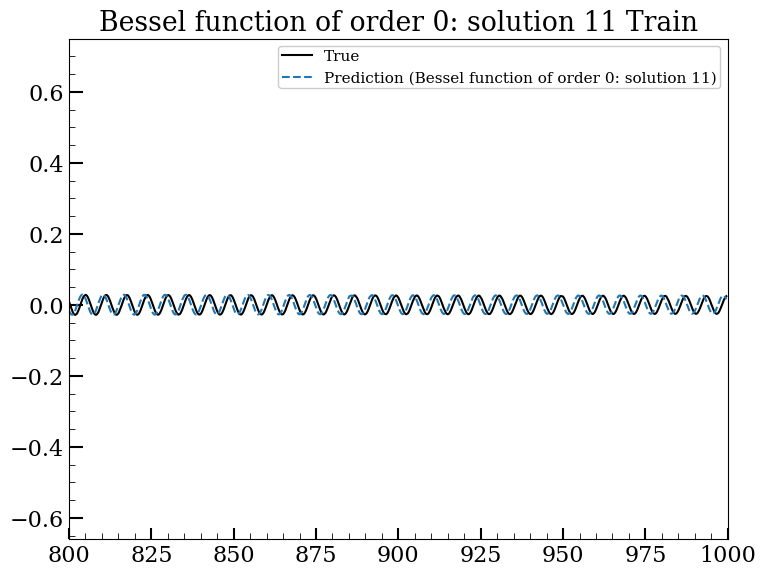

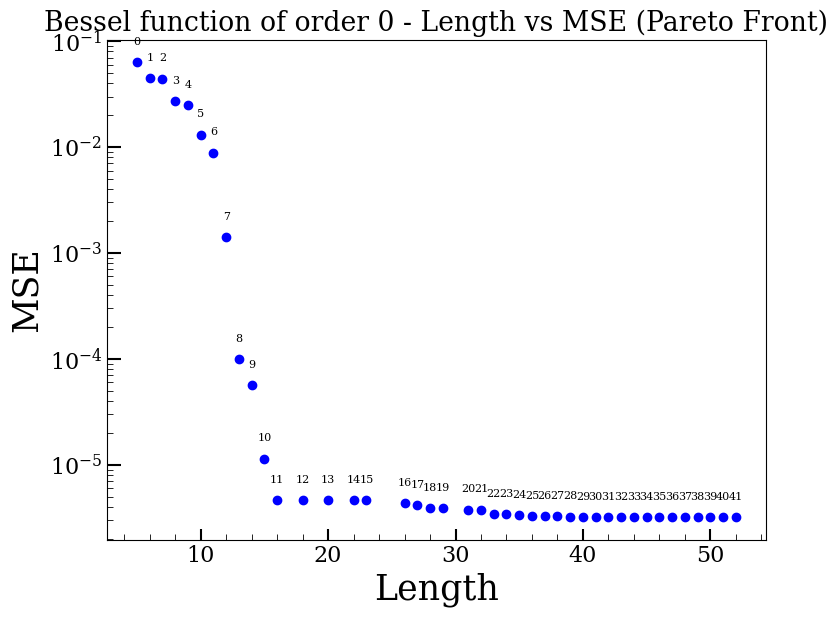

In [27]:
x_outside_train_range = np.sort(np.random.uniform(0, 1000, 10000))
Bessel_0.solutions[11].plot_results(x_outside_train_range, special.jv(order, x_outside_train_range))
plt.ylim(-0.66, 0.75)
plt.xlim(800, 1000)
Bessel_0.plot_l_vs_mse()

<IPython.core.display.Math object>

{'b0': 0.0005994762759999883, 'b1': 1.481621503829956, 'b2': 1.0012357234950287, 'b3': 0.8287659883500282, 'b4': 3.3942120075230378, 'b5': 1.0584224548260863}


/tmp/ipykernel_50131/3086724406.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2)


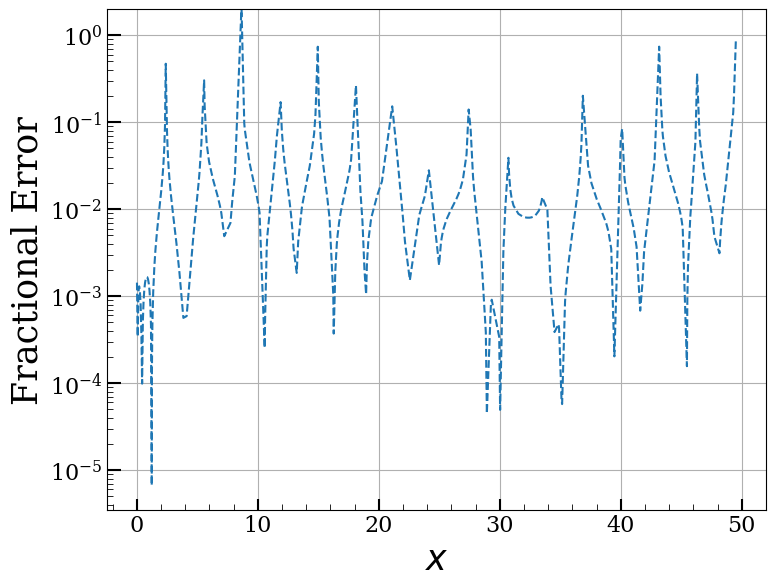

In [28]:
k=11
Bessel_0.solutions[k].display_expression()
b_vals = Bessel_0.solutions[k].extract_and_format()[1]
print(b_vals)
Bessel_0.solutions[k].plot_fractional_error_bessel(x_train, order, kind='first', spherical=False)
plt.ylim(0, 2)

In [32]:
str(Bessel_0.solutions[k].sympy_expr)

'b0 + b1*cos(X1*b2 - b3)/sqrt(X1*b4 + cos(sqrt(X1)*b5)**2)'

In [35]:
solution = Bessel_0.solutions[k]
sympy_expr ='b1*cos(X1 - pi/4)/sqrt(X1*b2 + cos(sqrt(X1)*b3)**2)'

#'b4*cos(X1 - pi/4)/sqrt(X1*b7 + cos(sqrt(X1)*b8)**2)'

Selected_sol_bessel_0 = Promising_solution(sp.parsing.sympy_parser.parse_expr(sympy_expr), (x_train, target_train), solution, initial_parameters=b_vals)

Selected_sol_bessel_0.optimisation()

`xtol` termination condition is satisfied.
Number of iterations: 157, function evaluations: 612, CG iterations: 260, optimality: 4.54e-08, constraint violation: 0.00e+00, execution time: 0.18 s.

Optimization summary:
Parameter | Old Value | New Value | Abs Difference
--------- | --------- | --------- | --------------
b1        | 1.48162   | 1.61762   | 0.136003      
b2        | 1.00124   | 4.09578   | 3.09455       
b3        | 0.828766  | 1.30603   | 0.477259      



(1.61762407946477*sin(X1 + pi/4)/sqrt(4.0957844723418*X1 + cos(1.30602532649269*sqrt(X1))**2),
 {'b1': np.float64(1.6176240794647687),
  'b2': np.float64(4.095784472341797),
  'b3': np.float64(1.306025326492693)},
 {'b1': np.float64(0.13600257563481266),
  'b2': np.float64(3.0945487488467682),
  'b3': np.float64(0.47725933814266486)},
 np.float64(0.0005789962964500532))

In [36]:
sp.latex(Selected_sol_bessel_0.sympy_expr)#, Selected_sol.modified_parameters

'\\frac{b_{1} \\sin{\\left(X_{1} + \\frac{\\pi}{4} \\right)}}{\\sqrt{X_{1} b_{2} + \\cos^{2}{\\left(\\sqrt{X_{1}} b_{3} \\right)}}}'

<Axes: title={'center': 'Absolute Error Comparison for Bessel Function (order=0)'}, xlabel='$x$', ylabel='Absolute Error'>

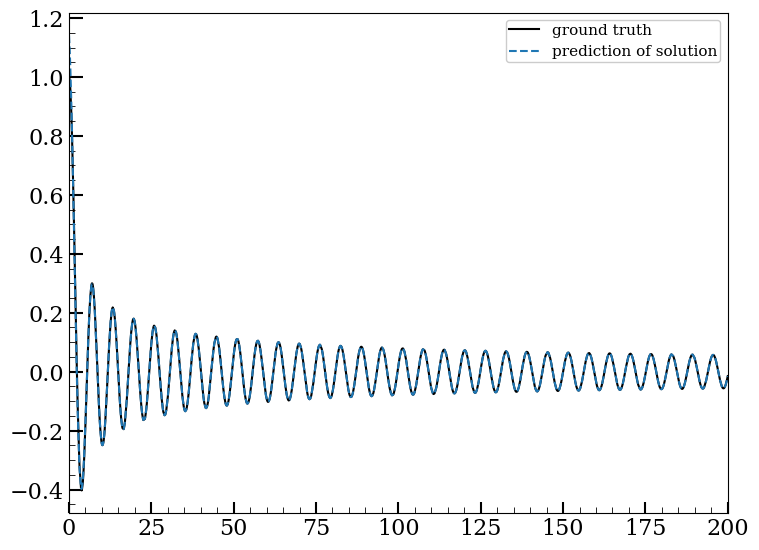

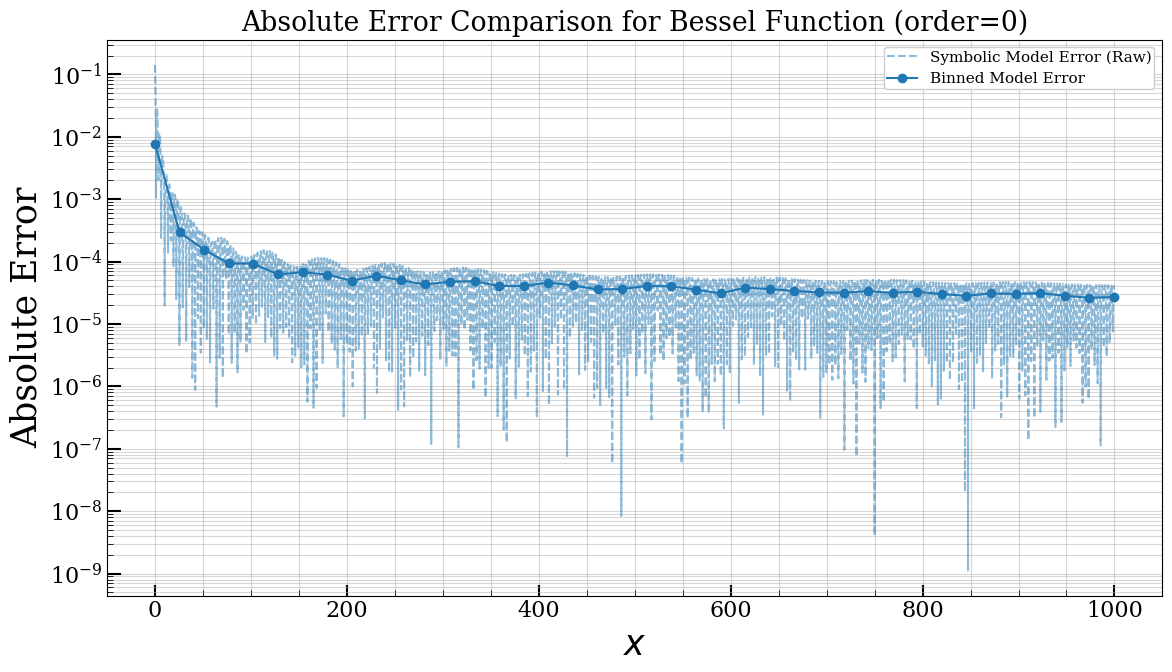

In [39]:
Selected_sol_bessel_0.plot_comparison(x_outside_train_range, special.jv(order, x_outside_train_range))
plt.xlim(0, 200)
Selected_sol_bessel_0.plot_error(x_outside_train_range, order, kind='first', spherical=False, metric='absolute', smoothing = 'binned')

----------------- Now for order 2 --------------------------

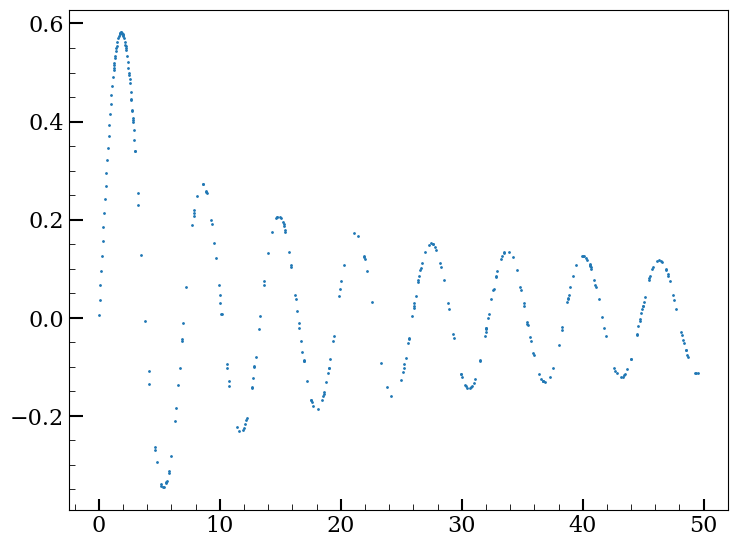

In [40]:
np.random.seed(42) #Keeping the seed for reproducibility

order_1 = 1

x_train = np.sort(np.concatenate((np.random.uniform(1, 50, 300), np.linspace(1e-2, 3, 50))))
x_test = np.sort(np.concatenate((np.random.uniform(1, 50, 300), np.linspace(1e-2, 3, 50))))
# Training data from uniform distribution
# x_test = np.sort(np.concatenate((np.random.uniform(0, 20, 300), np.linspace(0, 1.5, 300))))

# x_train = np.sort(np.random.uniform(0, 60, 1000))
# x_test = np.sort(np.random.uniform(0, 60, 1000))

target_train_bessel_1 = special.jv(order_1, x_train)
target_test_bessel_1 = special.jv(order_1, x_test)

plt.scatter(x_train, target_train_bessel_1, s=1)

In [ ]:
bessel_1_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,coRitchies,sqrt,square",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'], 
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 60*3,
    'n_threads': 12,
    'tournament_size': 2
}

Bessel_1 = Problem(f"Bessel function of order {order_1}", (x_train, target_train_bessel_1), (x_test, target_test_bessel_1), bessel_1_args)

In [54]:
Bessel_1.solve()
print(len(Bessel_1.solutions))

[0.19991132616996765, 5.0], 338.03, (0.207310900092 + ((-0.013773197308) * (0.434294492006 * X1))), 0.04
[0.18657582998275757, 6.0], 343.08, (0.073087736964 + ((-0.168186977506) * cos((1.026543498039 * X1)))), 0.03
[0.1751406192779541, 7.0], 342.89, (0.162763029337 + (0.221531465650 * cos(sqrt((0.390793025494 * X1))))), 0.03
[0.12965497374534607, 8.0], 345.77, (0.045255403966 + (0.262986391783 * cos(((0.986667633057 * X1) + 4.331822872162)))), 0.02
[0.12965494394302368, 9.0], 346.65, (0.045257244259 + ((-0.262984961271) * cos(((0.986667633057 * X1) + sqrt(1.416401743889))))), 0.02
[0.12597103416919708, 10.0], 359.00, (0.040382329375 + ((-0.249138772488) * cos(((1.022523045540 * X1) + (1.891306281090 / (0.995833933353 * X1)))))), 0.02
[0.08006571233272552, 11.0], 356.99, (0.009499152191 + ((-0.629119038582) * (cos(((0.970263659954 * X1) + 1.483533024788)) / sqrt((0.777631402016 * X1))))), 0.01
[0.04768567904829979, 12.0], 354.29, (0.013003011234 + ((-4.604413032532) * (cos(((0.980294764

<Axes: title={'center': 'Bessel function of order 1 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

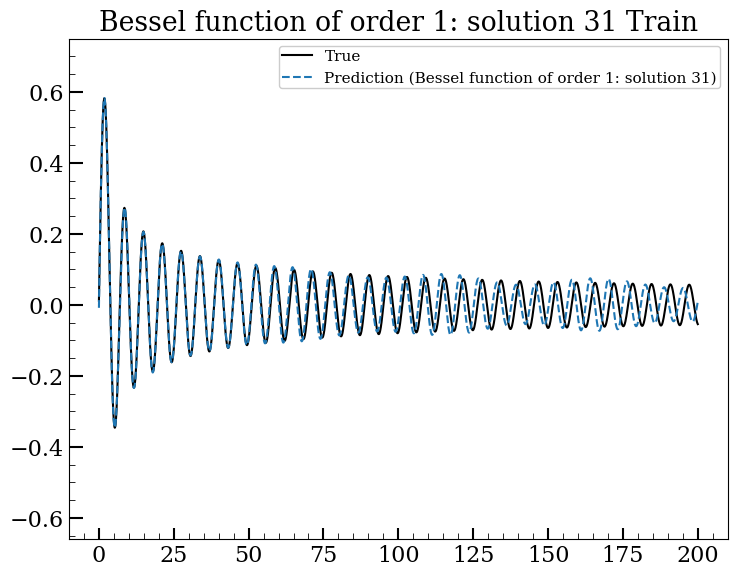

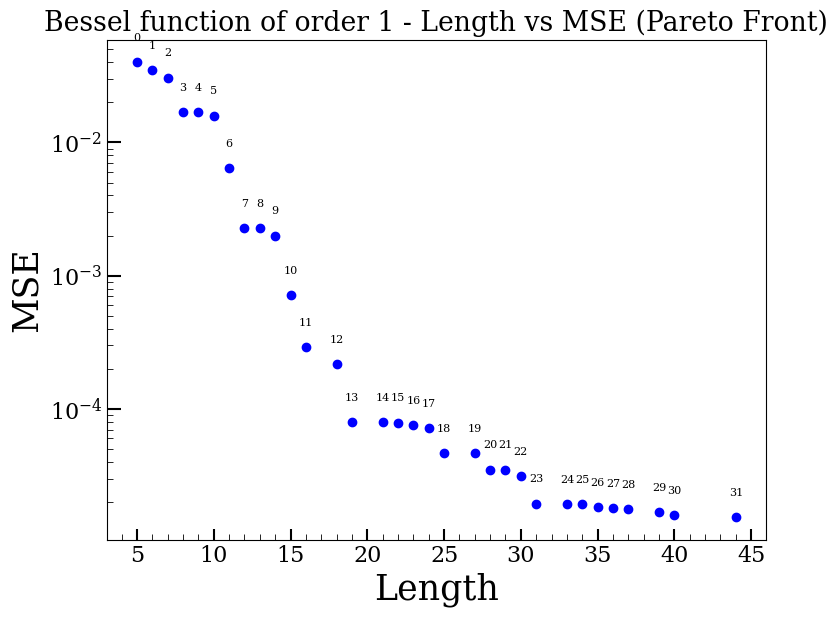

In [104]:
x_outside_train_range = np.sort(np.random.uniform(0, 200, 10000))
Bessel_1.solutions[-1].plot_results(x_outside_train_range, special.jv(order_1, x_outside_train_range))
plt.ylim(-0.66, 0.75)
Bessel_1.plot_l_vs_mse()

In [106]:
c_par_1 = -1

Bessel_1.solutions[c_par_1].display_expression(), Bessel_1.solutions[c_par_1].b_vals, str(Bessel_1.solutions[c_par_1].sympy_expr)

<IPython.core.display.Math object>

(None,
 {'b0': 1.1254926919939408,
  'b1': 1.9555156230931061,
  'b2': 0.8609103560449967,
  'b3': 1.9752844572069534,
  'b4': 0.8895878791810219,
  'b5': 1.1305242776870728,
  'b6': 0.564155817031974,
  'b7': 57.35473391836422,
  'b8': 1.586241006850969,
  'b9': 0.9083680705685993,
  'b10': 0.8831409215930535,
  'b11': 2.4403977409201616,
  'b12': 0.1385487117087223,
  'b13': 2.233327925207959,
  'b14': 15.146581649780273,
  'b15': 1.2201988704600808,
  'b16': 0.3722213208679932,
  'b17': 1.0138931274409515,
  'b18': 1.923596858978044,
  'b19': 0.8371921777729767,
  'b20': 1.5192531347270233},
 '-b0*sqrt(X1*b1 + cos(X1*b2))/sqrt(X1*b3 + cos(X1*b4)) - b0*cos(X1*b6)**2/(b14*cos(X1*b8 + cos(X1*b3))/(sqrt(X1)*b15*cos(X1*b10) + X1*b16 + cos(X1*b10)**2) + b7 + cos(X1*b8 + cos(X1*b3))**2/(X1**(3/2)*b9*cos(X1*b10) + sqrt(X1)*b11*cos(X1*b10)**3 + X1**2*b12 + X1*b13*cos(X1*b10)**2 + cos(X1*b10)**4)) - b0*cos(X1*b17 + b18/sqrt(X1*b19 + b20))/sqrt(X1*b3 + cos(X1*b4)) + b5')

In [107]:
#'b0 - b1*cos(X1*b2 + sqrt(X1*b3 + b4/X1))/(sqrt(X1)*b5 + b6/X1**2)')
Solution_t_modify = Bessel_1.solutions[c_par_1].int_analysis_and_modification()

  - Rounding parameters: ['b14', 'b15', 'b7']
Creating a new Promising solution: -b0*sqrt(X1*b1 + cos(X1*b2))/sqrt(X1*b3 + cos(X1*b4)) - b0*cos(X1*b6)**2/(57 + cos(X1*b8 + cos(X1*b3))**2/(X1**(3/2)*b9*cos(X1*b10) + sqrt(X1)*b11*cos(X1*b10)**3 + X1**2*b12 + X1*b13*cos(X1*b10)**2 + cos(X1*b10)**4) + 15*cos(X1*b8 + cos(X1*b3))/(sqrt(X1)*cos(X1*b10) + X1*b16 + cos(X1*b10)**2)) - b0*cos(X1*b17 + b18/sqrt(X1*b19 + b20))/sqrt(X1*b3 + cos(X1*b4)) + b5
Re-optimizing the remaining float parameters: ['b0', 'b1', 'b10', 'b11', 'b12', 'b13', 'b16', 'b17', 'b18', 'b19', 'b2', 'b20', 'b3', 'b4', 'b5', 'b6', 'b8', 'b9']
--- Starting Multi-Start Optimization (150 runs) ---
  Running optimization 1/150...
`xtol` termination condition is satisfied.
Number of iterations: 157, function evaluations: 2983, CG iterations: 622, optimality: 1.11e+04, constraint violation: 0.00e+00, execution time:  0.6 s.

Optimization summary:
Parameter | Old Value | New Value | Abs Difference
--------- | --------- | ---------

/home/danielct/Desktop/Internship_Oxford_2025/venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


`xtol` termination condition is satisfied.
Number of iterations: 899, function evaluations: 17043, CG iterations: 5911, optimality: 5.27e-04, constraint violation: 0.00e+00, execution time:  3.6 s.

Optimization summary:
Parameter | Old Value | New Value | Abs Difference
--------- | --------- | --------- | --------------
b0        | 1.10533   | 3.33094   | 2.22561       
b1        | 1.94712   | 1.89944   | 0.0476735     
b10       | 0.858339  | 1.18546   | 0.327123      
b11       | 2.47343   | 2.7988    | 0.325371      
b12       | 0.144641  | 0.561508  | 0.416867      
b13       | 2.18465   | 1.48609   | 0.698558      
b16       | 0.384596  | 0.411911  | 0.0273156     
b17       | 1.05416   | 0.043385  | 1.01077       
b18       | 1.99435   | 1.84635   | 0.148         
b19       | 0.811368  | 0.0444461 | 0.766922      
b2        | 0.860827  | 0.898063  | 0.0372359     
b20       | 1.48384   | 0.784891  | 0.698946      
b3        | 1.96269   | 0.715734  | 1.24696       
b4        | 0.

RuntimeError: Optimization inconclusive. No stable parameter set was found 3 or more times.

In [68]:
str(Solution_t_modify.sympy_expr)
#Solution_t_modify.modified_parameters

'-b1*cos(X1*b2 + b3)/sqrt(X1 + cos(X1))'

In [69]:
sympy_expr_bss_1 = '-b1*cos(X1 + pi/4)/sqrt(X1 + cos(X1))'


Selected_sol_bessel_1 = Promising_solution(sp.parsing.sympy_parser.parse_expr(sympy_expr_bss_1), (x_train, target_train_bessel_1), Bessel_1.solutions[c_par_1], initial_parameters=Solution_t_modify.modified_parameters)

Selected_sol_bessel_1.optimisation()

`gtol` termination condition is satisfied.
Number of iterations: 3, function evaluations: 6, CG iterations: 2, optimality: 1.16e-10, constraint violation: 0.00e+00, execution time: 0.0027 s.

Optimization summary:
Parameter | Old Value | New Value | Abs Difference
--------- | --------- | --------- | --------------
b1        | 0.79632   | 0.79429   | 0.00203008    



(-0.794289748190114*cos(X1 + pi/4)/sqrt(X1 + cos(X1)),
 {'b1': np.float64(0.7942897481901137)},
 {'b1': np.float64(0.0020300823135813717)},
 np.float64(0.014850887704363104))

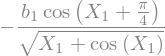

In [70]:
Selected_sol_bessel_1.sympy_expr

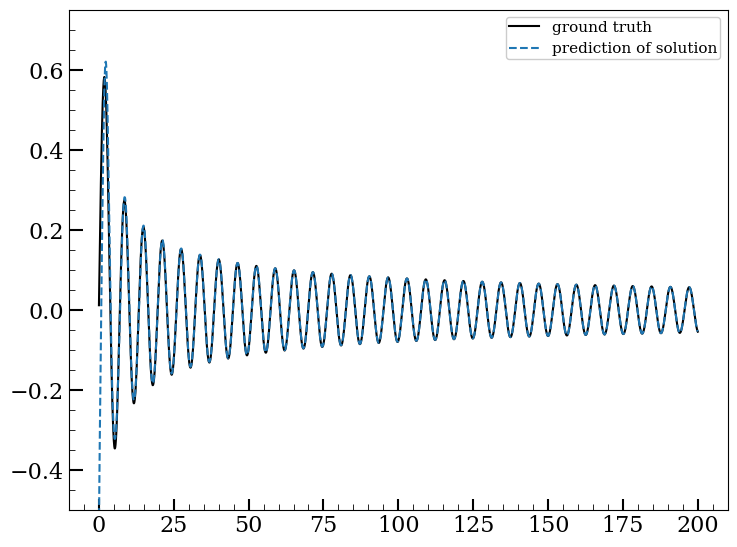

In [108]:
Selected_sol_bessel_1.plot_comparison(x_outside_train_range, special.jv(order_1, x_outside_train_range))
plt.ylim(-1/2, 3/4)
# Selected_sol_bessel_1.plot_error(x_outside_train_range, order_1, kind='first', spherical=False, metric='absolute', smoothing = 'binned')
# plt.xlim(0, 50)

plt.savefig("Bessel_comparison.pdf", dpi=450)

Using recurrence relation to find bessels of higher orders

/home/danielct/Desktop/Internship_Oxford_2025/BesselML/BesselML/main.py:1643: RuntimeWarning: overflow encountered in power
  term = ((-1)**k * (x / 2)**(2*k)) / (factorial(k) * gamma(v + k + 1))
/home/danielct/Desktop/Internship_Oxford_2025/BesselML/BesselML/main.py:1644: RuntimeWarning: invalid value encountered in add
  total_sum += term
/home/danielct/Desktop/Internship_Oxford_2025/BesselML/BesselML/main.py:1643: RuntimeWarning: overflow encountered in scalar multiply
  term = ((-1)**k * (x / 2)**(2*k)) / (factorial(k) * gamma(v + k + 1))
/home/danielct/Desktop/Internship_Oxford_2025/BesselML/BesselML/main.py:1643: RuntimeWarning: invalid value encountered in divide
  term = ((-1)**k * (x / 2)**(2*k)) / (factorial(k) * gamma(v + k + 1))


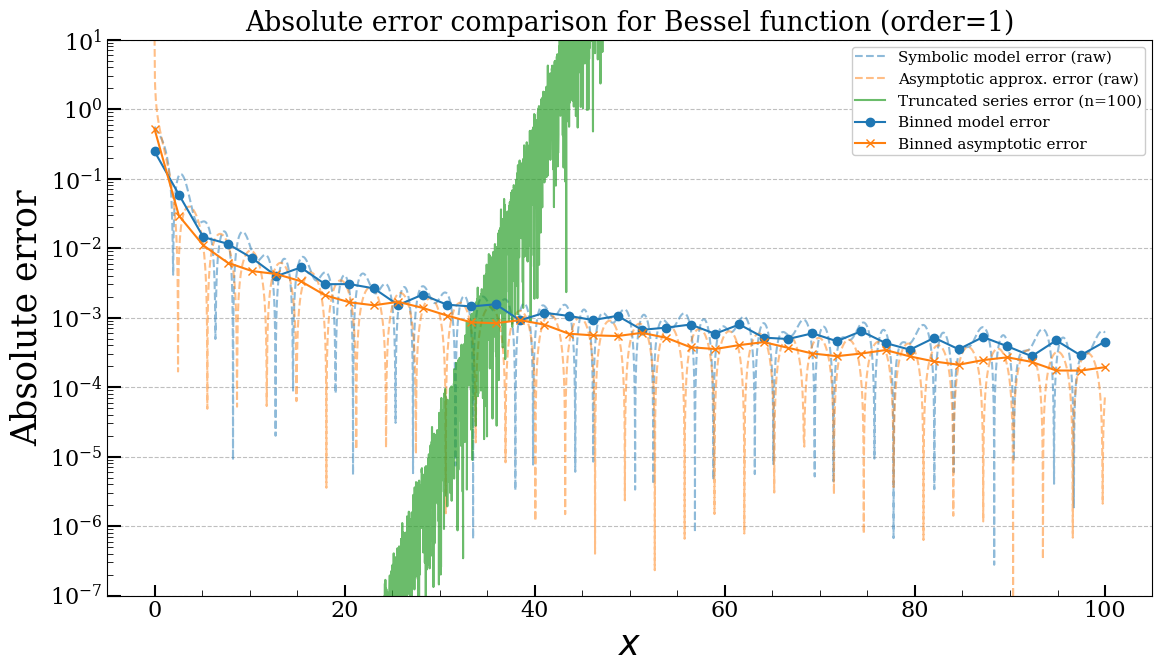

In [101]:
x_outside_train_range = np.sort(np.random.uniform(0, 100, 10000))
Selected_sol_bessel_1.plot_error(x_outside_train_range, order_1, kind='first', spherical=False, metric='absolute', smoothing = 'binned', show_approx=True, show_trunc=True, trunc_index=100)
plt.ylim(1e-7, 1e1)

#plt.savefig("absolute_error_comparison_bessel_1.pdf", dpi=450)

Converting symbolic expressions to numerical functions...
Initial numerical arrays created.
Calculating MSE for base orders 0 and 1...
Calculating errors for orders 2 through 10...
Calculation complete.


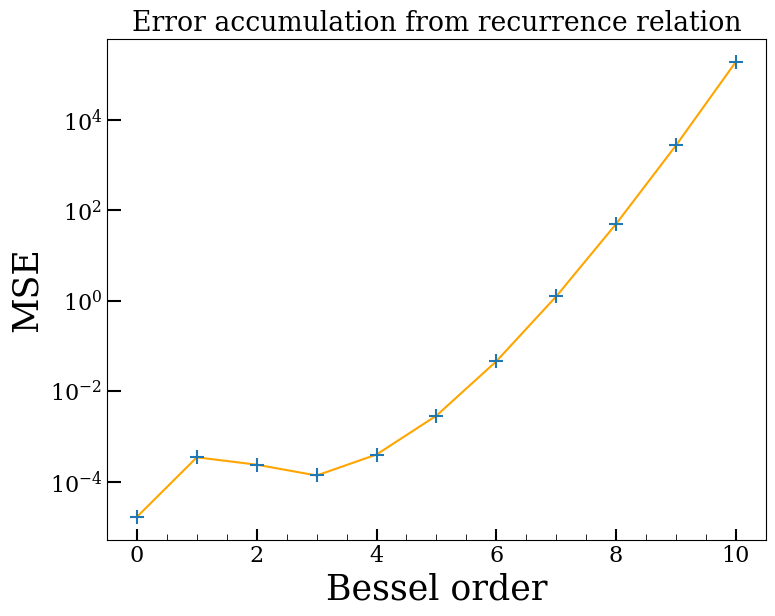

In [90]:
def compute_recurrence_error_from_symbolic(j0_expr, j1_expr, x_data, max_order):
    """
    Takes symbolic sympy expressions for J0 and J1, and computes the 
    recurrence error for higher orders, including the base cases 0 and 1.

    Args:
        j0_expr (sympy.Expr): A sympy expression for J0(x) with variable 'X1'.
        j1_expr (sympy.Expr): A sympy expression for J1(x) with variable 'X1'.
        x_data (np.ndarray): The x-values to evaluate the expressions on.
        max_order (int): The maximum order of the Bessel function to compute.

    Returns:
        tuple[np.ndarray, np.ndarray]: A tuple containing:
            - orders (np.ndarray): The orders computed (from 0 to max_order).
            - mse_values (np.ndarray): The MSE for each corresponding order.
    """
    if max_order < 1:
        raise ValueError("max_order must be 1 or greater.")

    # --- Part 1: Convert Symbolic Expressions to Numerical Arrays ---
    print("Converting symbolic expressions to numerical functions...")
    X1 = sp.Symbol('X1')
    
    modules_map = [{'sqrt': np.sqrt}, 'numpy']
    f_j0 = sp.lambdify((X1,), j0_expr, modules=modules_map)
    f_j1 = sp.lambdify((X1,), j1_expr, modules=modules_map)
    
    j0_values = f_j0(x_data)
    j1_values = f_j1(x_data)
    print("Initial numerical arrays created.")

    # --- NEW: Calculate MSE for base cases (order 0 and 1) ---
    print("Calculating MSE for base orders 0 and 1...")
    j0_true = special.jv(0, x_data)
    j1_true = special.jv(1, x_data)
    
    mse0 = np.mean((j0_true - j0_values)**2)
    mse1 = np.mean((j1_true - j1_values)**2)

    # --- Part 2: Perform Recurrence Calculation and Error Analysis ---
    print(f"Calculating errors for orders 2 through {max_order}...")
    x_safe = np.copy(x_data)
    zero_mask = (x_safe == 0)
    epsilon = 1e-30
    x_safe[zero_mask] = epsilon
    
    # Initialize containers with the base case results
    mse_values = [mse0, mse1]
    orders_computed = np.arange(0, max_order + 1)
    
    # Check if we only needed to compute up to order 1
    if max_order == 1:
        return orders_computed, np.array(mse_values)
        
    j_prev = j0_values
    j_curr = j1_values

    # Loop to calculate errors for orders 2 and up
    for v in range(1, max_order):
        j_next_recurrent = (2 * v / x_safe) * j_curr - j_prev
        j_next_recurrent[zero_mask] = 0.0
        j_next_true = special.jv(v + 1, x_data)
        mse = np.mean((j_next_true - j_next_recurrent)**2)
        mse_values.append(mse)
        j_prev = j_curr
        j_curr = j_next_recurrent
        
    print("Calculation complete.")
    return orders_computed, np.array(mse_values)


orders, mse_values = compute_recurrence_error_from_symbolic(Selected_sol_bessel_0.numerical_expr,Selected_sol_bessel_1.numerical_expr , np.linspace(2, 50, 2000) , 10)

plt.scatter(orders, mse_values,marker="+", s=100, zorder=1)
plt.plot(orders, mse_values, c='orange', zorder=0)
plt.yscale("log")
plt.ylabel("MSE")
plt.xlabel("Bessel order")
plt.title("Error accumulation from recurrence relation")
#plt.savefig("err_accumulation.pdf", dpi=450)
mse_values[-1]

<Axes3D: title={'center': 'Surface of Absolute Residual in Bessel Recurrence'}, xlabel='x value', ylabel='Bessel Order (v)', zlabel='log10(Absolute Residual)'>

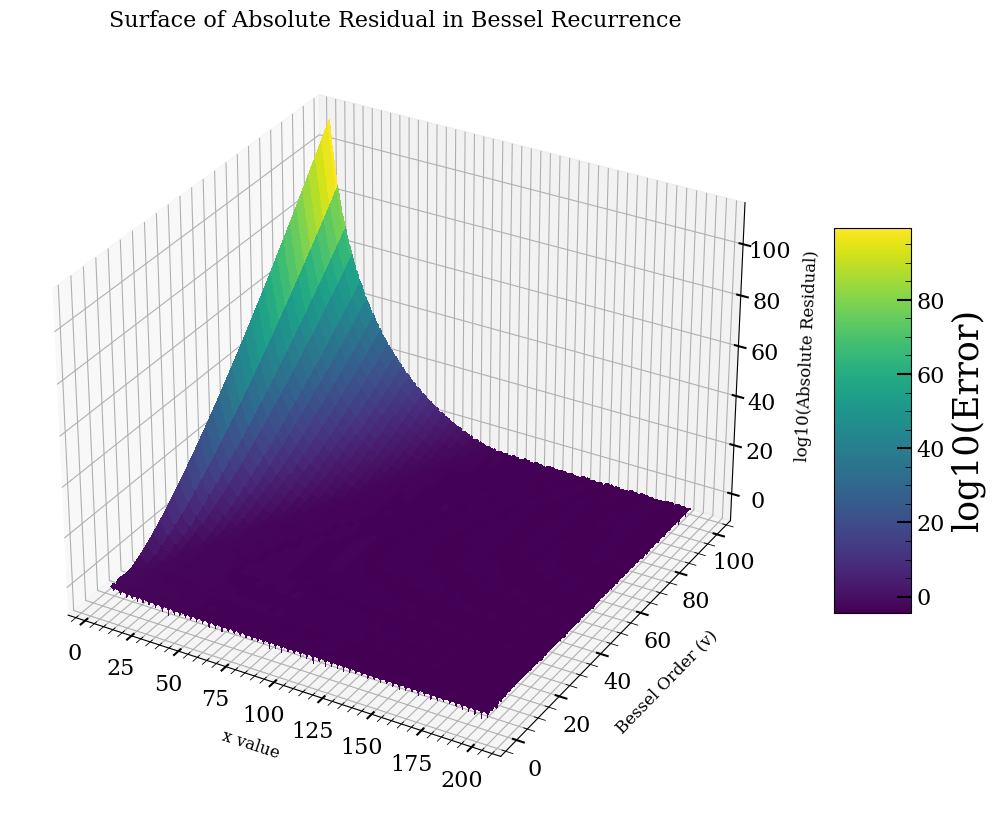

In [74]:
# Required for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_recurrence_error_surface(j0_expr, j1_expr, x_data, max_order, ax=None):
    """
    Takes symbolic sympy expressions for J0 and J1, computes the recurrence,
    and creates a 3D surface plot of the absolute residual against order and x.

    Args:
        j0_expr (sympy.Expr): A sympy expression for J0(x) with variable 'X1'.
        j1_expr (sympy.Expr): A sympy expression for J1(x) with variable 'X1'.
        x_data (np.ndarray): The x-values to evaluate the expressions on.
        max_order (int): The maximum order of the Bessel function to compute.
        ax (Axes3D, optional): A 3D axes object to plot on. If None, a new
                               figure and axes are created.

    Returns:
        matplotlib.axes.Axes: The 3D axes containing the plot.
    """
    if max_order < 1:
        raise ValueError("max_order must be 1 or greater.")

    # --- Part 1: Convert Symbolic Expressions to Numerical Arrays ---
    X1 = sp.Symbol('X1')
    modules_map = [{'sqrt': np.sqrt}, 'numpy']
    f_j0 = sp.lambdify((X1,), j0_expr, modules=modules_map)
    f_j1 = sp.lambdify((X1,), j1_expr, modules=modules_map)
    j0_values = f_j0(x_data)
    j1_values = f_j1(x_data)

    # --- Part 2: Perform Recurrence and Store All Residuals ---
    x_safe = np.copy(x_data)
    zero_mask = (x_safe == 0)
    epsilon = 1e-30
    x_safe[zero_mask] = epsilon
    
    # Store the absolute residual for each order in this list
    all_residuals = []
    orders = np.arange(0, max_order + 1)
    
    # Calculate residuals for base cases
    all_residuals.append(np.abs(special.jv(0, x_data) - j0_values))
    all_residuals.append(np.abs(special.jv(1, x_data) - j1_values))
    
    j_prev = j0_values
    j_curr = j1_values

    # Loop to calculate residuals for orders 2 and up
    for v in range(1, max_order):
        j_next_recurrent = (2 * v / x_safe) * j_curr - j_prev
        j_next_recurrent[zero_mask] = 0.0
        j_next_true = special.jv(v + 1, x_data)
        residual = np.abs(j_next_true - j_next_recurrent)
        all_residuals.append(residual)
        j_prev = j_curr
        j_curr = j_next_recurrent
        
    # Convert list of 1D arrays into a 2D array for plotting
    Z_residuals = np.array(all_residuals)

    # --- Part 3: Create the 3D Surface Plot ---
    if ax is None:
        fig = plt.figure(figsize=(14, 10))
        ax = fig.add_subplot(111, projection='3d')

    # Create a meshgrid for the X (x_data) and Y (orders) axes
    X, Y = np.meshgrid(x_data, orders)
    
    # Plot the surface. Use a logarithmic color map for better visualization.
    # We add a small epsilon to the residuals before taking the log to avoid log(0).
    surf = ax.plot_surface(X, Y, np.log10(Z_residuals + epsilon), cmap=cm.viridis,
                           linewidth=0, antialiased=False)

    ax.set_xlabel('x value', fontsize=12, labelpad=10)
    ax.set_ylabel('Bessel Order (v)', fontsize=12, labelpad=10)
    ax.set_zlabel('log10(Absolute Residual)', fontsize=12, labelpad=10)
    ax.set_title('Surface of Absolute Residual in Bessel Recurrence', fontsize=16)
    
    # Add a color bar which maps values to colors.
    fig = ax.get_figure()
    fig.colorbar(surf, shrink=0.5, aspect=5, label='log10(Error)')

    return ax

plot_recurrence_error_surface(Selected_sol_bessel_0.numerical_expr,Selected_sol_bessel_1.numerical_expr , np.linspace(5, 200, 2000) , 100)

Experiment with Hilbert transform - decomposing the function to amplitude and phase

Original shape of x_data: (1000,)
------------------------------
Shapes of data after trimming:
Shape of x_data_trimmed: (600,)
Shape of target_amplitude_trimmed: (600,)
Shape of target_phase_trimmed: (600,)


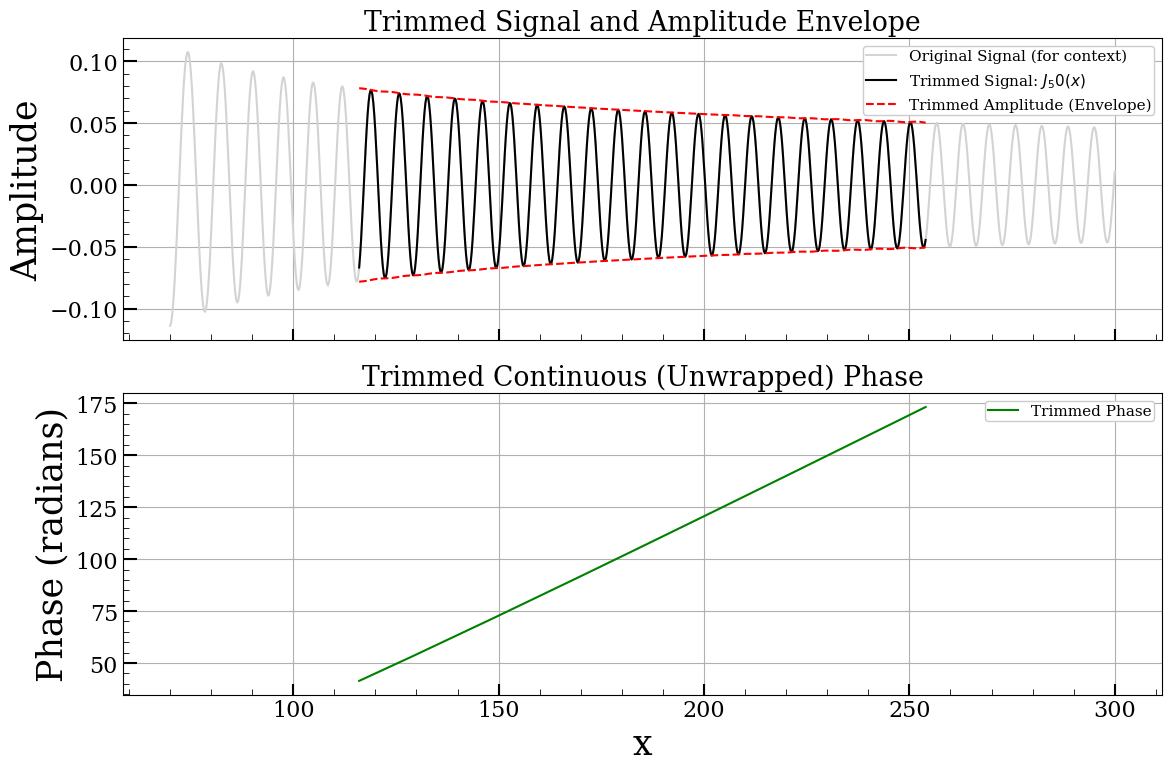

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy.signal import hilbert

# --- Step 1: Generate the Ideal Signal ---
# We'll use the Bessel function of the first kind, order 0.

order = 50
# Generate x-values. Start from a small positive number to avoid issues at x=0.
# Use enough points for a smooth curve.
x_data_hilbert = np.linspace(70, 300, 1000) 
y_true_bessel = special.jv(order, x_data_hilbert)


# --- Step 2: Compute the Analytic Signal using the Hilbert Transform ---
# This is the core step. 'hilbert' takes your real-valued signal and returns
# a complex-valued array known as the analytic signal.
analytic_signal = hilbert(y_true_bessel)


# --- Step 3: Extract Instantaneous Amplitude and Phase ---

# The instantaneous amplitude is the magnitude (absolute value) of the analytic signal.
# This gives us the envelope of the oscillation.
target_amplitude = np.abs(analytic_signal)

# The instantaneous phase is the angle of the analytic signal.
# CRITICAL: We use np.unwrap() to remove the 2*pi jumps that np.angle creates,
# resulting in a smooth, continuous phase curve that is perfect for regression.
target_phase = np.unwrap(np.angle(analytic_signal))


# --- NEW SECTION: Implement Solution 1 - Trim the Edges ---
# Define what percentage of the signal to trim from each end. 5% is a good start.
trim_percent = 20.0

trim_points = int(len(x_data_hilbert) * trim_percent / 100)

# Use array slicing to keep only the central part of the data.
# It is CRUCIAL to trim all arrays to keep them synchronized.
x_data_trimmed = x_data_hilbert[trim_points:-trim_points]
y_true_bessel_trimmed = y_true_bessel[trim_points:-trim_points]
target_amplitude_trimmed = target_amplitude[trim_points:-trim_points]
target_phase_trimmed = target_phase[trim_points:-trim_points]
# --- END OF NEW SECTION ---


# --- Step 4: Visualize the TRIMMED Results ---
# The plotting code is updated to use the new '_trimmed' variables.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot 1: Amplitude Envelope
ax1.plot(x_data_hilbert, y_true_bessel, color='lightgray', label='Original Signal (for context)')
ax1.plot(x_data_trimmed, y_true_bessel_trimmed, label=f'Trimmed Signal: $J_{order}(x)$', color='k')
ax1.plot(x_data_trimmed, target_amplitude_trimmed, label='Trimmed Amplitude (Envelope)', color='red', linestyle='--')
ax1.plot(x_data_trimmed, -target_amplitude_trimmed, color='red', linestyle='--') # Plot negative envelope
ax1.set_title('Trimmed Signal and Amplitude Envelope')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(True)

# Plot 2: Unwrapped Phase
ax2.plot(x_data_trimmed, target_phase_trimmed, label='Trimmed Phase', color='green')
ax2.set_title('Trimmed Continuous (Unwrapped) Phase')
ax2.set_ylabel('Phase (radians)')
ax2.set_xlabel('x')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
#plt.show()

# Print the shapes of the new trimmed arrays to confirm they are ready for SR
print(f"Original shape of x_data: {x_data_hilbert.shape}")
print("-" * 30)
print("Shapes of data after trimming:")
print(f"Shape of x_data_trimmed: {x_data_trimmed.shape}")
print(f"Shape of target_amplitude_trimmed: {target_amplitude_trimmed.shape}")
print(f"Shape of target_phase_trimmed: {target_phase_trimmed.shape}")


In [41]:
amplitude_bessel_0_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,sqrt,square",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'], 
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 60,
    'max_time': 60*3,
    'n_threads': 12,
    'tournament_size': 3
}

amplitude_bessel_0 = Problem(f"Amplitude of Bessel (Hilber decomp) of {order}", (x_data_trimmed,  target_amplitude_trimmed), (x_data_trimmed, target_amplitude_trimmed), amplitude_bessel_0_args)

In [42]:
amplitude_bessel_0.solve()

[0.0013506102841347456, 5.0], 559.42, (0.096003279090 + (0.000470274012 * ((-0.400154858828) * X1))), 0.00
[0.0009810068877413869, 6.0], 562.59, (0.130088895559 + ((-0.005898676347) * sqrt((0.746360838413 * X1)))), 0.00
[0.0002280974731547758, 7.0], 563.65, (0.027884699404 + (1.625959277153 * (2.956628799438 / (0.819861114025 * X1)))), 0.00
[0.00019462135969661176, 8.0], 573.67, (0.216321557760 + (0.007061833050 * ((0.068636097014 * X1) - sqrt((6.573835372925 * X1))))), 0.00
[0.00013721581490244716, 9.0], 572.46, (0.016527272761 + (0.690231740475 * (sqrt(sqrt((1.010169029236 * X1))) / (0.319031596184 * X1)))), 0.00
[0.0001338901638519019, 10.0], 571.97, (0.004034078680 + (10.549511909485 * (0.017492055893 / sqrt(((0.068636097014 * X1) - 1.734767556190))))), 0.00
[0.00013285744353197515, 11.0], 573.91, ((-0.034939751029) + (0.194979876280 * sqrt(sqrt((0.521102845669 / ((0.068636097014 * X1) - 3.342707633972)))))), 0.00
[0.0001328442303929478, 12.0], 579.20, (0.000603305059 + (0.09103439

<Axes: title={'center': 'Amplitude of Bessel (Hilber decomp) of 50 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

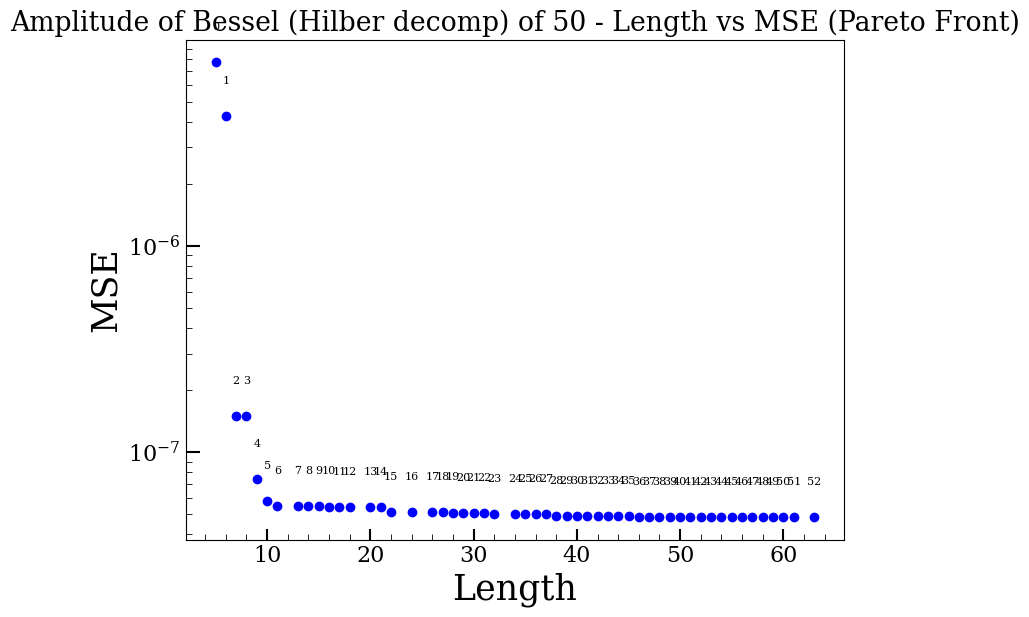

In [19]:
amplitude_bessel_0.plot_l_vs_mse()

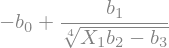

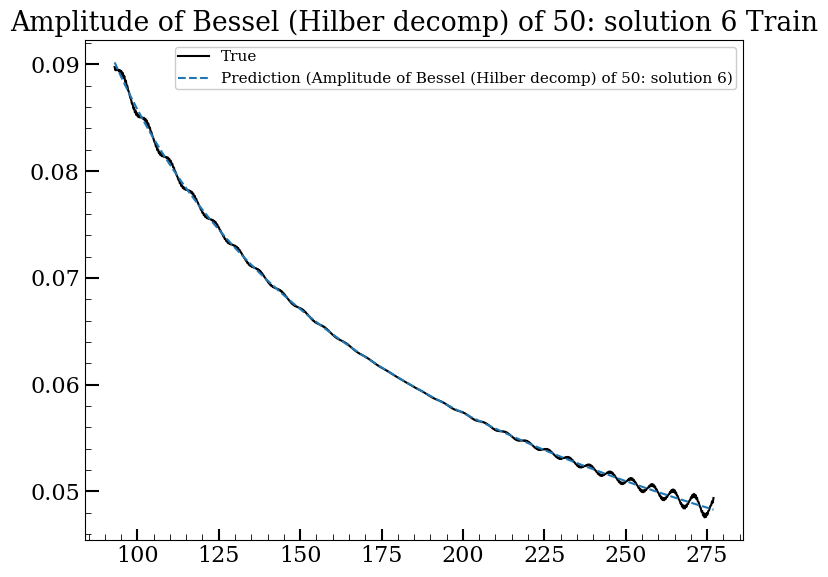

In [37]:
c_amp = 6
amplitude_bessel_0.solutions[c_amp].plot_results()
amplitude_bessel_0.solutions[c_amp].sympy_expr

In [38]:
phase_bessel_0_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,sqrt,square",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'], 
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 60,
    'max_time': 60*3,
    'n_threads': 12,
    'tournament_size': 3
}

phase_bessel_0 = Problem(f"Phase of Bessel (Hilber decomp) of {order}", (x_data_trimmed, target_phase_trimmed), (x_data_trimmed, target_phase_trimmed), phase_bessel_0_args)

In [25]:
phase_bessel_0.solve()

[0.6982425451278687, 5.0], 962.93, ((-69.901847839355) + ((-0.922400593758) * ((-1.035987973213) * X1))), 0.49
[0.6874850392341614, 7.0], 990.38, ((-69.872817993164) + ((-2504.548828125000) * ((2.305814981461 * X1) - (2.306196451187 * X1)))), 0.47
[0.10552229732275009, 8.0], 789.85, ((-36.903736114502) + ((-3.136771678925) * (sqrt((2.606764316559 * X1)) - (0.365194797516 * X1)))), 0.01
[0.009203772060573101, 9.0], 789.31, ((-86.252632141113) + (36.503707885742 * ((0.848781943321 / (0.023343026638 * X1)) + (0.027433156967 * X1)))), 0.00
[0.009196177124977112, 10.0], 801.12, ((-159.172760009766) + ((-4344.831542968750) * (((0.998448312283 + (0.027423931286 * X1)) ^ 2) / ((-3.263007879257) * X1)))), 0.00
[0.009137089364230633, 11.0], 820.22, (4369.867187500000 + (37.451454162598 * (((0.972081959248 + ((-3.263007879257) * X1)) / (0.027423931286 * X1)) + (0.026739070192 * X1)))), 0.00
[0.006711081136018038, 12.0], 805.55, ((-12.327051162720) + ((-4180.095214843750) * (((1.039717555046 - (0.

<Axes: title={'center': 'Phase of Bessel (Hilber decomp) of 50 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

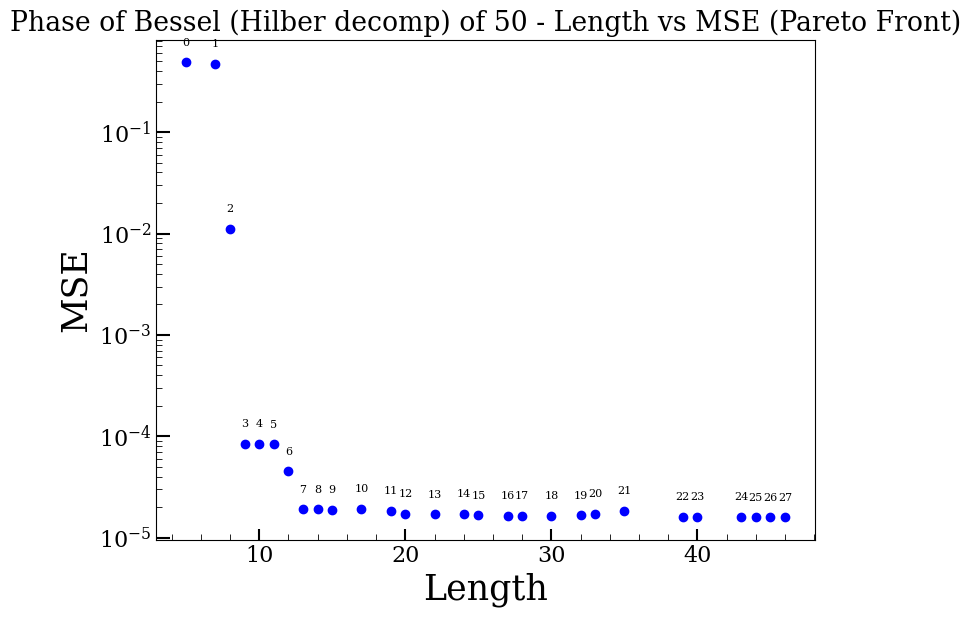

In [26]:
phase_bessel_0.plot_l_vs_mse()

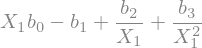

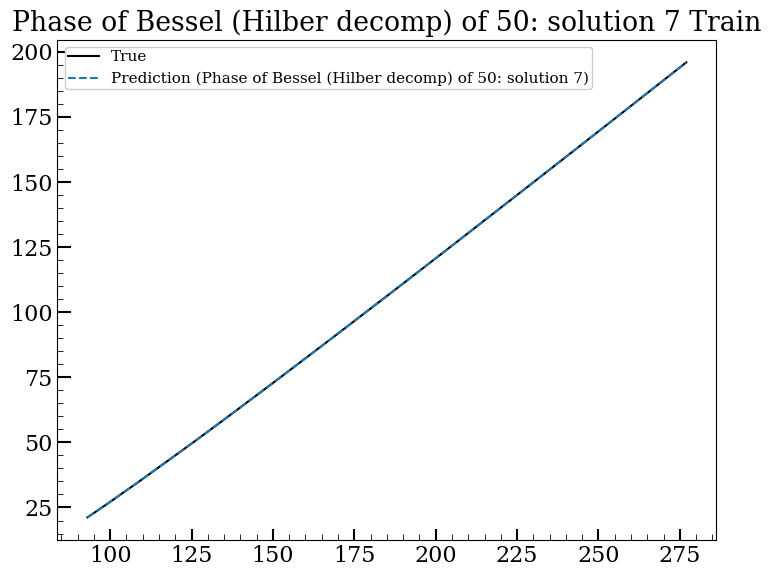

In [33]:
c_phi = 7
phase_bessel_0.solutions[c_phi].plot_results()
phase_bessel_0.solutions[c_phi].sympy_expr

In [39]:
# Assume amplitude_bessel_0 and phase_bessel_0 objects are loaded.

# 1. Define the symbolic variable
X1 = sp.Symbol('X1')

# 2. Extract the solution objects
amp_solution = amplitude_bessel_0.solutions[6]
phase_solution = phase_bessel_0.solutions[7]

# 3. Get the symbolic expressions
A_expr = amp_solution.sympy_expr
phi_expr = phase_solution.sympy_expr

# --- STEP 1: SUBSTITUTE NUMERICAL CONSTANTS ---
# This is the critical new step.
# NOTE: You might need to change '.params' to the correct attribute name 
# that holds the dictionary of constant values (e.g., .constants_).
A_numeric_expr = A_expr.subs(amp_solution.b_vals)
phi_numeric_expr = phi_expr.subs(phase_solution.b_vals)

# 4. Combine the now-numeric expressions
bessel_approx_expr = A_numeric_expr * sp.cos(phi_numeric_expr)

print("--- Final Expression with Numerical Constants ---")
print(bessel_approx_expr)
print("-" * 50)

# 5. Lambdify the final expression
# This now works because the only symbol left is X1.
# We keep the modules fix to be safe.
f_bessel_approx = sp.lambdify(
    (X1,), 
    bessel_approx_expr, 
    modules=[{'sqrt': np.sqrt}, 'numpy']
)

# 6. Generate data and plot (same as before)
x_data = np.linspace(40, 500, 2000)
order = 0
y_true = special.jv(order, x_data)

# This call will now succeed.
y_pred = f_bessel_approx(x_data)

# 7. Create the comparison plot
plt.figure(figsize=(14, 7))
plt.plot(x_data, y_true, label=f'True $J_{order}(x)$', color='black', linewidth=2)
plt.plot(x_data, y_pred, label=r'Reconstructed Approximation $A(x) \cos(\phi(x)) $', color='red', linestyle='--')
plt.title('Comparison of true Bessel function and reconstructed symbolic model')
plt.xlabel('$x$')
plt.legend()
plt.grid(True)
#plt.show()

# Assume amplitude_bessel_0 and phase_bessel_0 objects are loaded.


IndexError: list index out of range